<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA in Python

Here's a step-by-step explanation of how ANOVA and the F-test work:

**Step 1:** Formulate hypotheses:
- Null hypothesis (H0): There are no significant differences among the group means.
- Alternative hypothesis (Ha): At least one group mean is significantly different from the others.


**Step 2:** Calculate the F-test statistic:
The F-test statistic is computed as the ratio of the mean square between-groups (MSB) to the mean square within-groups (MSW):

$$
F = \frac{{MSB}}{{MSW}}
$$


**Step 3:** Determine the degrees of freedom:
- Degrees of freedom between-groups (DFB): Number of groups minus 1.
- Degrees of freedom within-groups (DFW): Total number of observations minus the number of groups.


**Step 4:** Calculate the mean square between-groups (MSB):
MSB is obtained by dividing the sum of squares between-groups (SSB) by the degrees of freedom between-groups (DFB):

$$
MSB = \frac{{SSB}}{{DFB}}
$$


**Step 5:** Calculate the mean square within-groups (MSW):
MSW is obtained by dividing the sum of squares within-groups (SSW) by the degrees of freedom within-groups (DFW):

$$
MSW = \frac{{SSW}}{{DFW}}
$$


**Step 6:** Determine the critical value:
The critical value for the F-test depends on the chosen significance level ($\alpha$) and the degrees of freedom for the between-groups and within-groups.


**Step 7:** Compare the calculated F-test statistic with the critical value:
If the calculated F-test statistic is greater than the critical value, we reject the null hypothesis and conclude that there are significant differences among the group means. Otherwise, we fail to reject the null hypothesis.


Let us test it in practice using python. The easiest way to perform a one-way ANOVA in python (i.e. to compute the f- and p-values) is to use the [scipy stats](https://docs.scipy.org/doc/scipy/reference/stats.html) package.

Consider the following **example**:

Researchers took **20 cars** of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.

# Step 0: postulate hypothesis
A one-way ANOVA has the below given null and alternative hypotheses:

- H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)

- H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

# Step1: load the data

First we need to load the data. Here we just

In [34]:
import pandas as pd
# Performance when each of the engine
# oil is applied
p1 = [89, 89, 88, 78, 79]
p2 = [93, 92, 94, 89, 88]
p3 = [89, 88, 89, 93, 90]
p4 = [81, 78, 81, 92, 82]

df=pd.DataFrame({'oil_1':p1,'oil_2':p2,'oil_3':p3,'oil_4':p4})
df

,oil_1,oil_2,oil_3,oil_4
0,89,93,89,81
1,89,92,88,78
2,88,94,89,81
3,78,89,93,92
4,79,88,90,82


# Step  2: Look at the data.

you can always plot the data using matplot lib. Here I use the boxplot funciton.

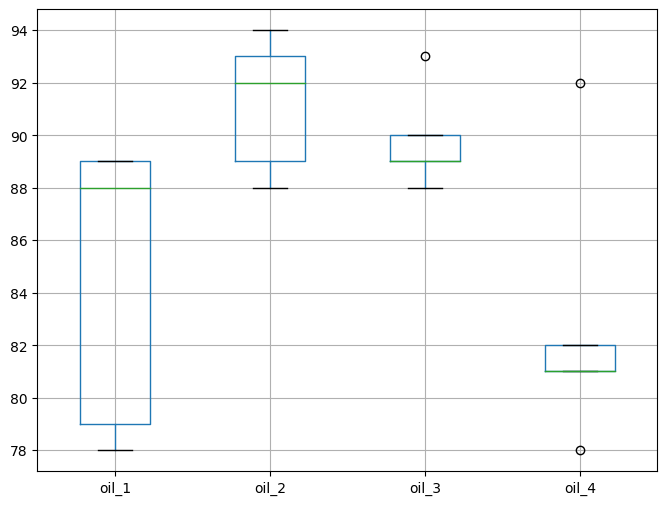

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
fig = df.boxplot()

Or with seaborn:

<Axes: >

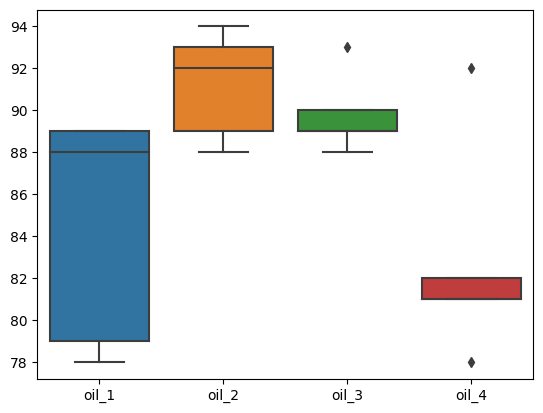

In [36]:
import seaborn as sns

sns.boxplot(df)

<Axes: >

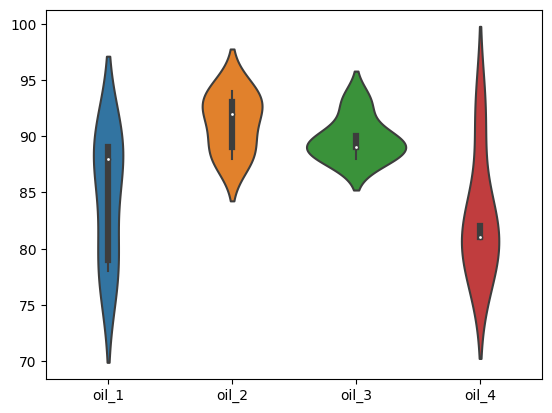

In [37]:
from seaborn.categorical import violinplot
sns.violinplot(df)

# Step 2: Conduct the one-way ANOVA:

In statmodels, we can perform a one-way ANOVA using the SciPy library. We will use [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).


In [38]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['oil_1'], df['oil_2'], df['oil_3'], df['oil_4'])
print('The f-value is: ', fvalue)
print('The p-value is:', pvalue)

The f-value is:  4.625000000000002
The p-value is: 0.016336459839780215


# Step 3: Interpretation of the results
The p-value is lower the 0.05 which implies that our null hypothesis is rejected. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils.

# Further analysis, which pair is problematic?

ANOVA (e.g. f_oneway) assesses whether the true means underlying each sample are identical. If we want to know which pair that that possibly could be problematic we can use multiple t-tests with and the Bonferroni correction.

In [54]:
pair=[]
t_values=[]
p_values=[]
for i in df.columns:
  for j in df.columns:
    if i!=j:
      pair.append(str(i)+'+'+str(j))
      t_test, p_value = stats.ttest_ind(df[i], df[j] )
      t_values.append(t_test)
      p_values.append(p_value)

data=pd.DataFrame({'pair':pair, 't_values':t_values, 'p_values':p_values})

data


,pair,t_values,p_values
0,oil_1+oil_2,-2.394072,0.043578
1,oil_1+oil_3,-1.965415,0.084944
2,oil_1+oil_4,0.519615,0.617399
3,oil_2+oil_1,2.394072,0.043578
4,oil_2+oil_3,0.970725,0.360115
5,oil_2+oil_4,3.156913,0.013457
6,oil_3+oil_1,1.965415,0.084944
7,oil_3+oil_2,-0.970725,0.360115
8,oil_3+oil_4,2.749860,0.025064
9,oil_4+oil_1,-0.519615,0.617399


Look at the results. What happens with the t_values if we change the order of the columns? what happens with the p_values? Which pair is the problmatic one?

# Tukey’s honestly significant difference (HSD)

The multiple pairwise t-test can be performed using [Tukey's test](https://en.wikipedia.org/wiki/Tukey%27s_range_test). We will use statmodels [pairwise_tukeyhsd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#scipy.stats.tukey_hsd) for this.

Tukey’s honestly significant difference (HSD) test performs pairwise comparison of means for a set of samples. Tukey’s HSD is a post hoc test used to compare the mean of each sample to the mean of each other sample. The **null hypothesis** is that the distributions underlying the samples all have the same mean. The test statistic, which is computed for every possible pairing of samples, is simply the difference between the sample means. For each pair, the p-value is the probability under the null hypothesis (and other assumptions; see notes) of observing such an extreme value of the statistic, considering that many pairwise comparisons are being performed. Confidence intervals for the difference between each pair of means are also available.

group1,group2,meandiff,p-adj,lower,upper,reject
oil_1,oil_2,6.6,0.1003,-0.9911,14.1911,False
oil_1,oil_3,5.2,0.2436,-2.3911,12.7911,False
oil_1,oil_4,-1.8,0.9038,-9.3911,5.7911,False
oil_2,oil_3,-1.4,0.9511,-8.9911,6.1911,False
oil_2,oil_4,-8.4,0.0276,-15.9911,-0.8089,True
oil_3,oil_4,-7.0,0.0761,-14.5911,0.5911,False


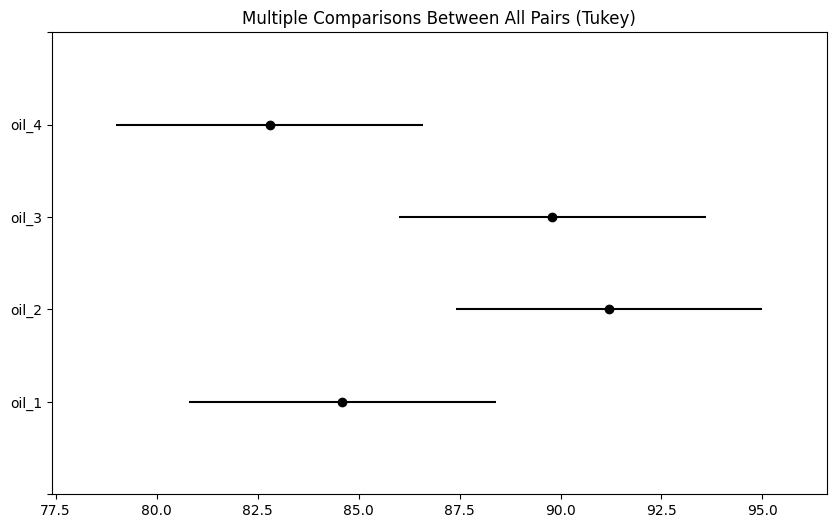

In [63]:
# Tukeys test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

#data_1=pd.DataFrame({"data-set": len(data_1)*["#1"], "data":data_1 })
#data_2=pd.DataFrame({"data-set": len(data_2)*["#2"],  "data":data_2 })
#data_3=pd.DataFrame({"data-set": len(data_3)*["#3"], "data":data_3 })

#data=pd.concat([data_1,data_2,data_3],ignore_index=True)
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['oil_1', 'oil_2', 'oil_3', 'oil_4'])
# replace column names
df_melt.columns = ['index', 'Oil', 'value']

tukey = pairwise_tukeyhsd(endog=df_melt['value'],     # Data
                         groups=df_melt['Oil'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()              # See test summary

Dit Tukey's test give you the same answer?